Data Mining - Week 5

        Cluster Analysis Exercise
        
        In this exercise, I'm going to do a hierarchical clustering task using the **complete-linkage** algorithm. For this, I'm going to use a database about consumers in a mall.
        
        This data contains the following fields:
        
        **CustomerID**
        **Genre**
        **Age**
        **Annual Income (k$)**
        **Spending Score (1-100)**: Consumers who spend more score higher
        
        This exercise is based on the example taken from the article "Hierarchical Clustering with Python and Scikit-Learn" https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ by Usman Malik, StackAbuse. 
        
        The data https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv was taken from the above article and is also available in this https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/shopping-data.csv     

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc # Plot dendrogram
from sklearn.cluster import AgglomerativeClustering # Hierarchical grouping

In [11]:
plt.rcParams["figure.figsize"] = (15,10)

In [12]:
# Database
url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/shopping-data.csv'
mall = pd.read_csv(url)
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Columns of interest
mall_2d = mall[['Annual Income (k$)', 'Spending Score (1-100)']]
mall_2d.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


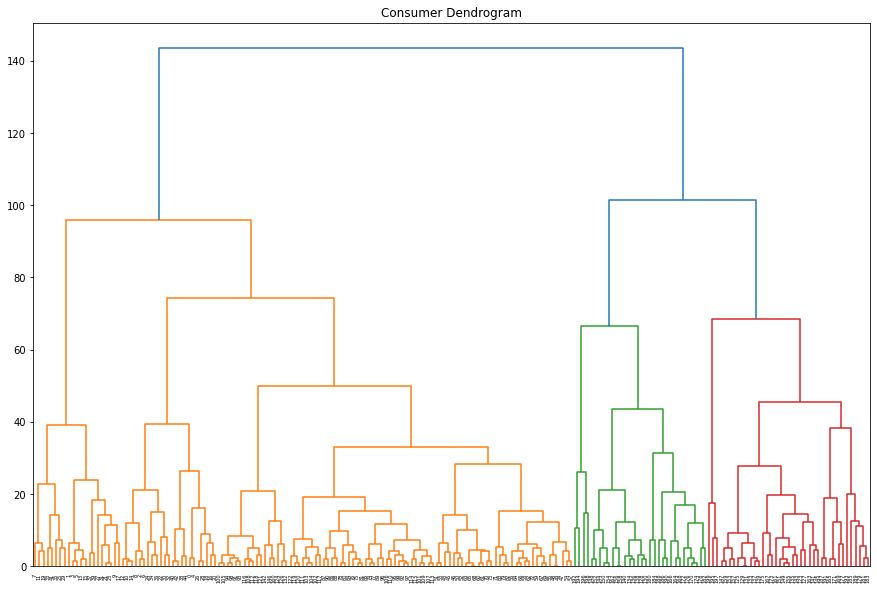

In [19]:
# Consumer Dendrogram
plt.title('Consumer Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(mall_2d, method = 'complete'))

In [21]:
# # See the greatest distances generated.
# Given the distribution, 5 groups were chosen.

n_groups = 5
groups = AgglomerativeClustering(n_clusters = n_groups, affinity = 'euclidean', linkage ='complete')
groups.fit_predict(mall_2d)

# Groups with each object that has been sequentially sorted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

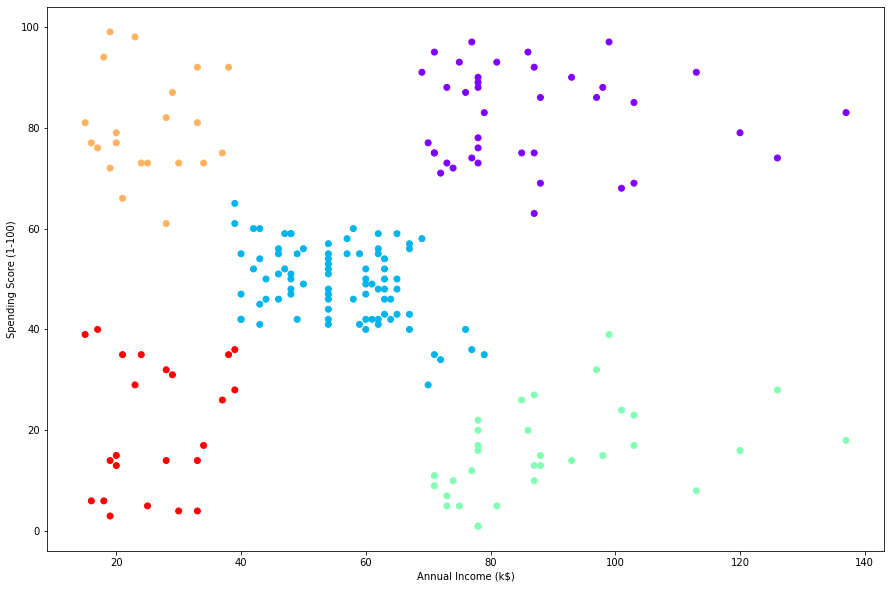

In [22]:
# Visualize with scatterplot
plt.scatter(mall_2d['Annual Income (k$)'], mall_2d['Spending Score (1-100)'], c = groups.labels_, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

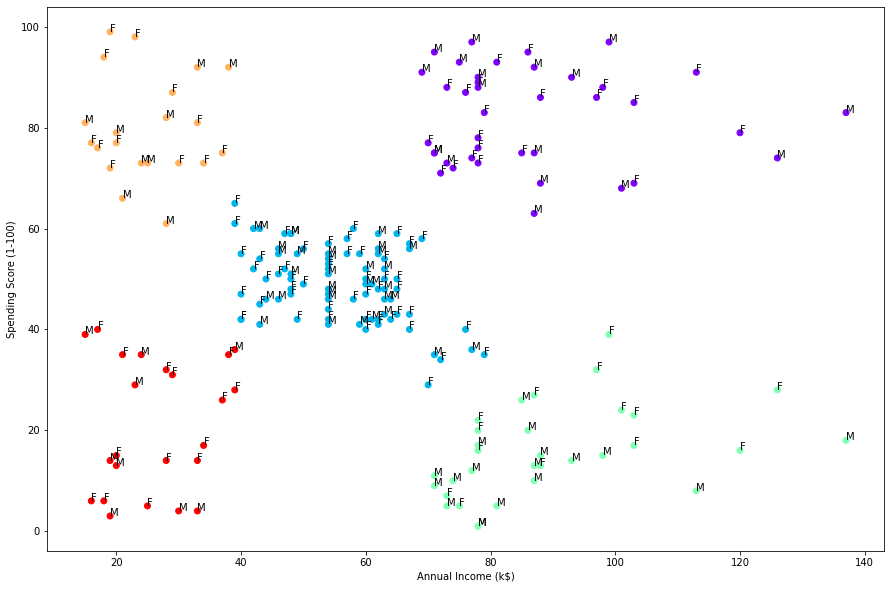

In [24]:
# See the gender of these consumers.
# Label each of these points - subplots
# Returns 2 values: graph representation axis and figure
fig, axis = plt.subplots()

plt.scatter(mall_2d['Annual Income (k$)'], mall_2d['Spending Score (1-100)'], c = groups.labels_, cmap='rainbow')

axis.set_xlabel('Annual Income (k$)')
axis.set_ylabel('Spending Score (1-100)')

for i, text in enumerate(mall['Genre']):
  if text == 'Female':
    axis.annotate('F', (mall.iloc[i]['Annual Income (k$)'], mall.iloc[i]['Spending Score (1-100)']))
  else:
    axis.annotate('M', (mall.iloc[i]['Annual Income (k$)'], mall.iloc[i]['Spending Score (1-100)']))

plt.show()

In [25]:
# There is not much difference between the genres.